In [5]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics 
from xgboost import XGBRegressor 


### Data Collection and Processing

In [7]:
df_calories = pd.read_csv("calories.csv")
df_exercise = pd.read_csv("exercise.csv")

In [8]:
df_calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [9]:
df_exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [11]:
df_concat = pd.merge(df_exercise , df_calories , on = "User_ID")

### Data Visualitation

In [12]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

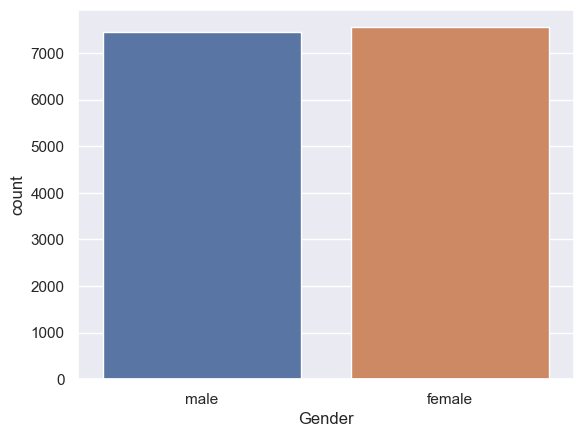

In [21]:
sns.countplot(x = 'Gender' , data = df_concat)

In [15]:
print(df_concat['Gender'].dtype)

# Checking for unique values in the 'Gender' column
print(df_concat['Gender'].unique())

object
['male' 'female']


In [17]:
print(df_concat.isnull().sum())

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [22]:
#finding the distrubition of 'Age' column 

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_3432\1472109468.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_concat['Age'])


<Axes: xlabel='Age', ylabel='Density'>

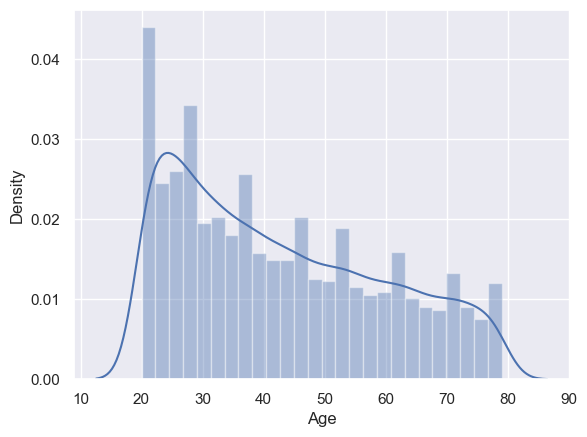

In [28]:
sns.distplot(df_concat['Age'])

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_3432\876809325.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_concat['Height'])


<Axes: xlabel='Height', ylabel='Density'>

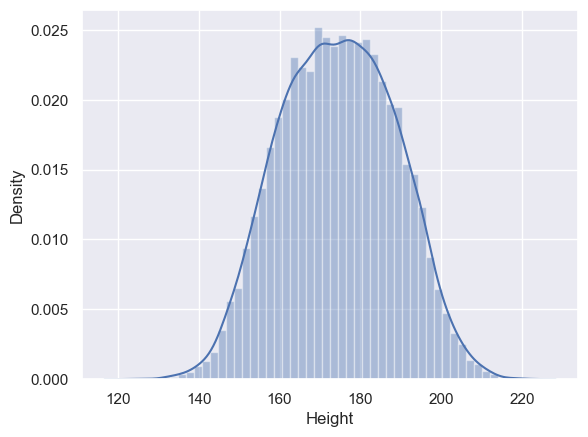

In [31]:
sns.distplot(df_concat['Height'])

In [26]:
df_concat.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


C:\Users\MONSTER\AppData\Local\Temp\ipykernel_3432\2838862511.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_concat['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

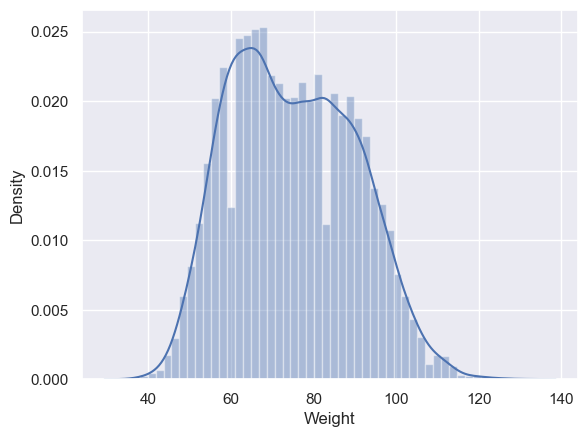

In [32]:
sns.distplot(df_concat['Weight'])

In [46]:
df_correlation = df_concat.drop('User_ID' , axis = 1)


df_encoded = pd.get_dummies(df_correlation, drop_first=True)

# Calculate correlation with the transformed DataFrame
correlation = df_encoded.corr()
print(correlation)

                  Age    Height    Weight  Duration  Heart_Rate  Body_Temp  \
Age          1.000000  0.009554  0.090094  0.013247    0.010482   0.013175   
Height       0.009554  1.000000  0.958451 -0.004625    0.000528   0.001200   
Weight       0.090094  0.958451  1.000000 -0.001884    0.004311   0.004095   
Duration     0.013247 -0.004625 -0.001884  1.000000    0.852869   0.903167   
Heart_Rate   0.010482  0.000528  0.004311  0.852869    1.000000   0.771529   
Body_Temp    0.013175  0.001200  0.004095  0.903167    0.771529   1.000000   
Calories     0.154395  0.017537  0.035481  0.955421    0.897882   0.824558   
Gender_male  0.003222  0.710534  0.783186  0.003440    0.011555   0.007264   

             Calories  Gender_male  
Age          0.154395     0.003222  
Height       0.017537     0.710534  
Weight       0.035481     0.783186  
Duration     0.955421     0.003440  
Heart_Rate   0.897882     0.011555  
Body_Temp    0.824558     0.007264  
Calories     1.000000     0.022357  
G

<Axes: >

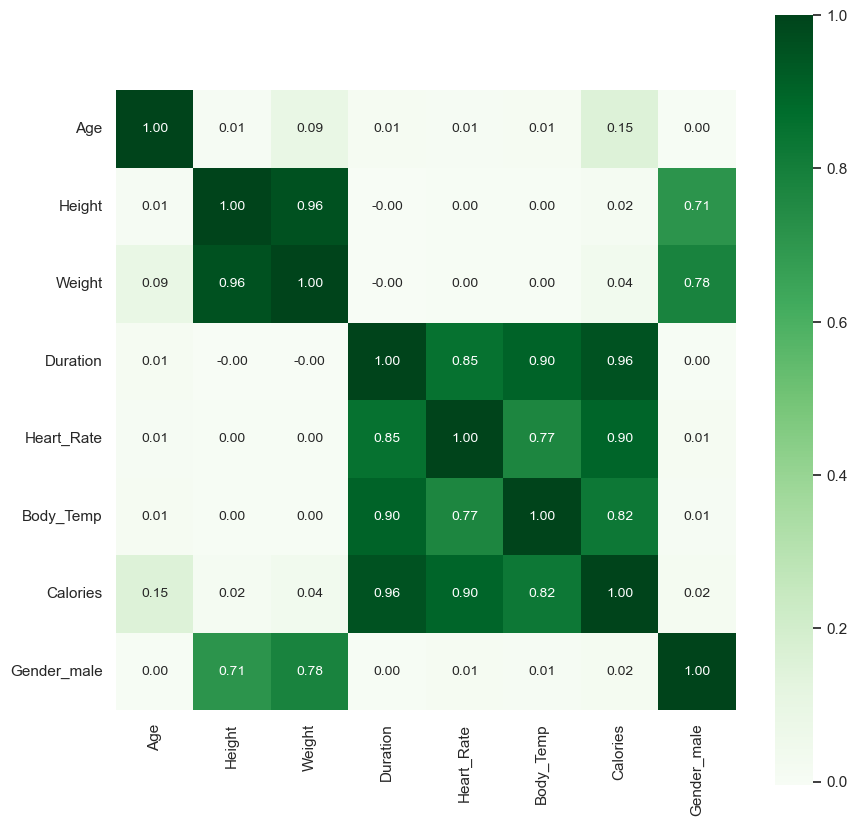

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar = True , square=True ,
            fmt = '.2f', annot = True , annot_kws = {'size':10},
            cmap = 'Greens' )

In [53]:
df_concat.replace({'Gender' : {'male' : 0 , 'female' : 1}} , inplace=True)

In [54]:
df_concat.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [55]:
#Splitting the dataset to x and y

In [58]:
X = df_concat.drop(['User_ID' , 'Calories'] , axis = 1 )
Y = df_concat['Calories']

In [59]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [60]:
X_train , X_test , Y_train , Y_test  = train_test_split(X, Y ,
                                                       test_size = 0.2,
                                                       random_state = 2 ,
                                                       )

In [61]:
print(X.shape, X_train.shape , Y_test.shape)

(15000, 7) (12000, 7) (3000,)


In [62]:
#XGBoost Regressor

In [63]:
model = XGBRegressor()

In [64]:
model.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Prediction and Evaluate on test data

In [65]:
test_data_preidction = model.predict(X_test)

In [66]:
print(test_data_preidction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [67]:
#Mean Absolute Error

In [68]:
mae = metrics.mean_absolute_error(Y_test , test_data_preidction)

In [69]:
print("Mean Absolute Error : " , mae)

Mean Absolute Error :  1.4833678883314132


In [70]:
from sklearn.metrics import r2_score

In [72]:
r2 = r2_score(Y_test, test_data_preidction)
print("R² (Yüzdelik Doğruluk Oranı): {:.2f}%".format(r2 * 100))

R² (Yüzdelik Doğruluk Oranı): 99.88%
